## Import all the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn import neighbors
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, mean_absolute_error

## Convert the csv files to dataframes

In [2]:
dataset = pd.read_excel('DS - Assignment Part 1 data set.xlsx')

## Explore the dataset and analyse it 

In [3]:
dataset

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,1,491,43.1
...,...,...,...,...,...,...,...,...,...
409,2013.000000,13.7,4082.01500,0,24.94155,121.50381,3,803,15.4
410,2012.666667,5.6,90.45606,9,24.97433,121.54310,2,1278,50.0
411,2013.250000,18.8,390.96960,7,24.97923,121.53986,1,503,40.6
412,2013.000000,8.1,104.81010,5,24.96674,121.54067,1,597,52.5


In [4]:
dataset.info

<bound method DataFrame.info of      Transaction date  House Age  Distance from nearest Metro station (km)  \
0         2012.916667       32.0                                  84.87882   
1         2012.916667       19.5                                 306.59470   
2         2013.583333       13.3                                 561.98450   
3         2013.500000       13.3                                 561.98450   
4         2012.833333        5.0                                 390.56840   
..                ...        ...                                       ...   
409       2013.000000       13.7                                4082.01500   
410       2012.666667        5.6                                  90.45606   
411       2013.250000       18.8                                 390.96960   
412       2013.000000        8.1                                 104.81010   
413       2013.500000        6.5                                  90.45606   

     Number of convenience stor

In [5]:
dataset.columns

Index(['Transaction date', 'House Age',
       'Distance from nearest Metro station (km)',
       'Number of convenience stores', 'latitude', 'longitude',
       'Number of bedrooms', 'House size (sqft)', 'House price of unit area'],
      dtype='object')

In [6]:
dataset.dtypes

Transaction date                            float64
House Age                                   float64
Distance from nearest Metro station (km)    float64
Number of convenience stores                  int64
latitude                                    float64
longitude                                   float64
Number of bedrooms                            int64
House size (sqft)                             int64
House price of unit area                    float64
dtype: object

In [7]:
dataset.shape

(414, 9)

## Identify the null values 

In [8]:
dataset.isnull().sum()

Transaction date                            0
House Age                                   0
Distance from nearest Metro station (km)    0
Number of convenience stores                0
latitude                                    0
longitude                                   0
Number of bedrooms                          0
House size (sqft)                           0
House price of unit area                    0
dtype: int64

#### There are no null values in this dataset

## Check if the data is normalized using visualization

C:\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


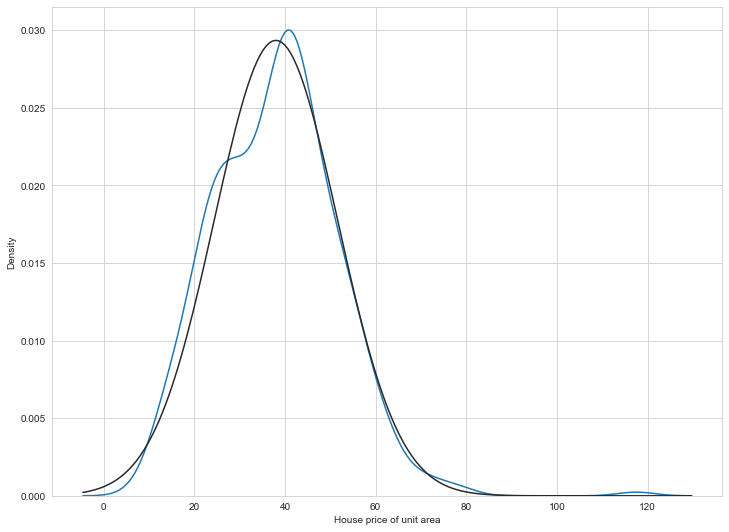

In [9]:
from scipy.stats import norm
sns.set_style('whitegrid')
plt.figure(figsize = (12,9))
sns.distplot(dataset['House price of unit area'], fit = norm, hist = False)
plt.show()

#### It seems the dataset is in it's almost normal form

## Let's check for outliers 

C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


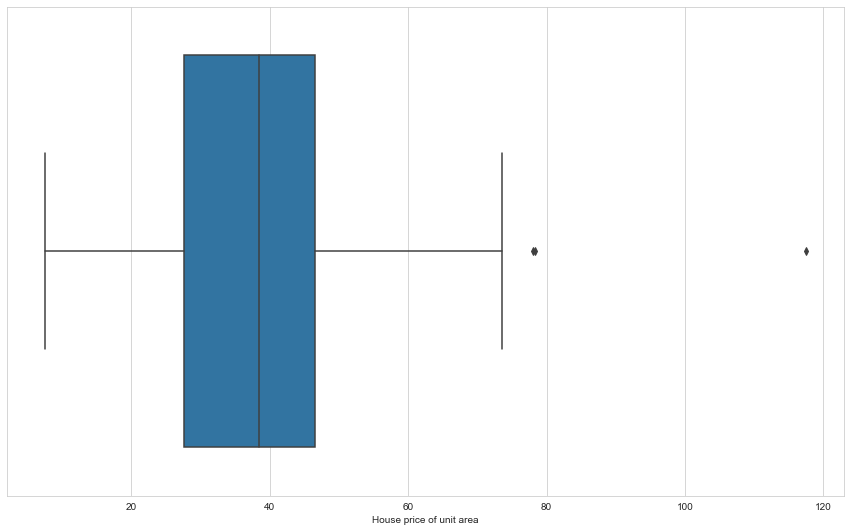

In [10]:
sns.set_style('whitegrid')
plt.figure(figsize = (15,9))
sns.boxplot('House price of unit area', data = dataset)
plt.show()

#### There are in total 3 outliers, but since the dataset is very small with 414 records, only one outlier which is extremely out of the limit is eliminated.

In [11]:
dataset[(dataset['House price of unit area']>110)]

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
270,2013.333333,10.8,252.5822,1,24.9746,121.53046,2,1373,117.5


In [12]:
dataset = dataset.drop(270)

In [13]:
dataset[(dataset['House price of unit area']>75)]

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
220,2013.333333,37.2,186.5101,9,24.97703,121.54265,2,1187,78.3
312,2013.583333,35.4,318.5292,9,24.97071,121.54069,1,433,78.0


## Let's again chech for mormalization after eliminating an outlier

C:\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


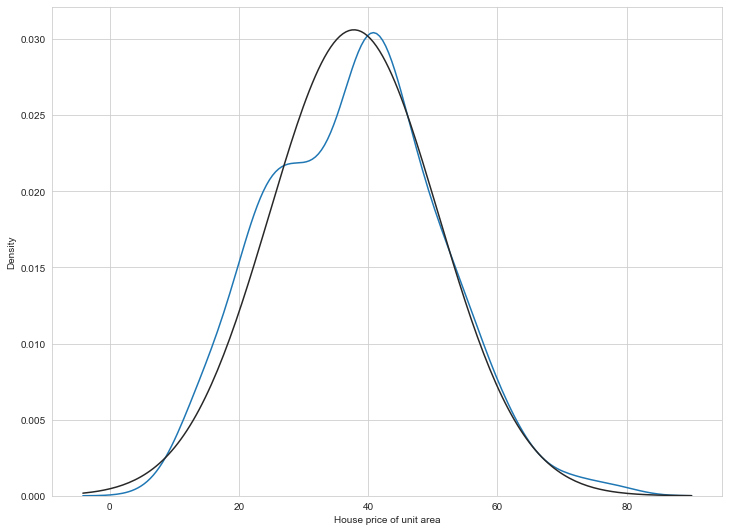

In [14]:
sns.set_style('whitegrid')
plt.figure(figsize = (12,9))
sns.distplot(dataset['House price of unit area'], fit = norm, hist = False)
plt.show()

# ## Now we check the variance, correlation and other central tendencies for the dataset to eliminate any columns that donot play a significant role in decision making 

In [15]:
dataset.describe()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
count,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000
mean,2013.148507,17.729298,1085.898530,4.101695,24.969017,121.533368,1.987893,930.406780,37.787651
std,0.282191,11.401205,1262.974876,2.945182,0.012422,0.015365,0.819868,348.653908,13.046097
min,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530,1.000000,402.000000,7.600000
25%,2012.916667,9.000000,289.324800,1.000000,24.962990,121.527600,1.000000,548.000000,27.700000
50%,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630,2.000000,975.000000,38.400000
75%,2013.416667,28.200000,1455.798000,6.000000,24.977460,121.543310,3.000000,1234.000000,46.600000
max,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,3.000000,1500.000000,78.300000


In [16]:
dataset.corr()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
Transaction date,1.000000,0.018523,0.061990,0.011232,0.034330,-0.040788,0.061993,0.066560,0.081757
House Age,0.018523,1.000000,0.024676,0.048131,0.055119,-0.048822,-0.008739,-0.058638,-0.210985
Distance from nearest Metro station (km),0.061990,0.024676,1.000000,-0.605328,-0.590805,-0.807079,-0.046858,0.003827,-0.694009
Number of convenience stores,0.011232,0.048131,-0.605328,1.000000,0.445994,0.449239,0.043734,0.036633,0.612635
latitude,0.034330,0.055119,-0.590805,0.445994,1.000000,0.413249,0.043916,0.030384,0.563954
longitude,-0.040788,-0.048822,-0.807079,0.449239,0.413249,1.000000,0.041689,0.009923,0.549250
Number of bedrooms,0.061993,-0.008739,-0.046858,0.043734,0.043916,0.041689,1.000000,0.753697,0.052269
House size (sqft),0.066560,-0.058638,0.003827,0.036633,0.030384,0.009923,0.753697,1.000000,0.029859
House price of unit area,0.081757,-0.210985,-0.694009,0.612635,0.563954,0.549250,0.052269,0.029859,1.000000


#### By looking at the correlatioin table, it is quite clear that fields like transaction date, latitude and longitude do not make a big difference so they should be dropped

In [17]:
dataset.columns

Index(['Transaction date', 'House Age',
       'Distance from nearest Metro station (km)',
       'Number of convenience stores', 'latitude', 'longitude',
       'Number of bedrooms', 'House size (sqft)', 'House price of unit area'],
      dtype='object')

In [18]:
dataset.drop(['Transaction date','latitude', 'longitude'],axis = 1, inplace = True)

In [19]:
dataset

,House Age,Distance from nearest Metro station (km),Number of convenience stores,Number of bedrooms,House size (sqft),House price of unit area
0,32.0,84.87882,10,1,575,37.9
1,19.5,306.59470,9,2,1240,42.2
2,13.3,561.98450,5,3,1060,47.3
3,13.3,561.98450,5,2,875,54.8
4,5.0,390.56840,5,1,491,43.1
...,...,...,...,...,...,...
409,13.7,4082.01500,0,3,803,15.4
410,5.6,90.45606,9,2,1278,50.0
411,18.8,390.96960,7,1,503,40.6
412,8.1,104.81010,5,1,597,52.5


In [20]:
dataset.columns

Index(['House Age', 'Distance from nearest Metro station (km)',
       'Number of convenience stores', 'Number of bedrooms',
       'House size (sqft)', 'House price of unit area'],
      dtype='object')

In [21]:
dataset['Number of convenience stores'].unique()

array([10,  9,  5,  3,  7,  6,  1,  4,  2,  8,  0], dtype=int64)

In [22]:
dataset['Number of bedrooms'].unique()

array([1, 2, 3], dtype=int64)

## Using one hot encoding for the number of bedrooms

In [23]:
dataset = pd.get_dummies(dataset, columns = ['Number of bedrooms'])

In [24]:
dataset

,House Age,Distance from nearest Metro station (km),Number of convenience stores,House size (sqft),House price of unit area,Number of bedrooms_1,Number of bedrooms_2,Number of bedrooms_3
0,32.0,84.87882,10,575,37.9,1,0,0
1,19.5,306.59470,9,1240,42.2,0,1,0
2,13.3,561.98450,5,1060,47.3,0,0,1
3,13.3,561.98450,5,875,54.8,0,1,0
4,5.0,390.56840,5,491,43.1,1,0,0
...,...,...,...,...,...,...,...,...
409,13.7,4082.01500,0,803,15.4,0,0,1
410,5.6,90.45606,9,1278,50.0,0,1,0
411,18.8,390.96960,7,503,40.6,1,0,0
412,8.1,104.81010,5,597,52.5,1,0,0


## Splitting the data into features and target variables 

In [25]:
X = dataset.drop(['House price of unit area'], axis = 1)

In [26]:
y = dataset['House price of unit area']

In [27]:
X

,House Age,Distance from nearest Metro station (km),Number of convenience stores,House size (sqft),Number of bedrooms_1,Number of bedrooms_2,Number of bedrooms_3
0,32.0,84.87882,10,575,1,0,0
1,19.5,306.59470,9,1240,0,1,0
2,13.3,561.98450,5,1060,0,0,1
3,13.3,561.98450,5,875,0,1,0
4,5.0,390.56840,5,491,1,0,0
...,...,...,...,...,...,...,...
409,13.7,4082.01500,0,803,0,0,1
410,5.6,90.45606,9,1278,0,1,0
411,18.8,390.96960,7,503,1,0,0
412,8.1,104.81010,5,597,1,0,0


In [28]:
y

0      37.9
1      42.2
2      47.3
3      54.8
4      43.1
       ... 
409    15.4
410    50.0
411    40.6
412    52.5
413    63.9
Name: House price of unit area, Length: 413, dtype: float64

## Splitting the data into training and testing sets

In [29]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.20,random_state = 2)

In [30]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((330, 7), (83, 7), (330,), (83,))

In [31]:
X_train.columns

Index(['House Age', 'Distance from nearest Metro station (km)',
       'Number of convenience stores', 'House size (sqft)',
       'Number of bedrooms_1', 'Number of bedrooms_2', 'Number of bedrooms_3'],
      dtype='object')

## Applying Linear Regression as the first algorithm and training the model on it

In [32]:
model = LinearRegression()

In [33]:
model.fit(X_train,y_train)

LinearRegression()

In [34]:
model.coef_ , model.intercept_

(array([-2.36083875e-01, -5.09429369e-03,  1.38471975e+00,  3.51718024e-04,
         1.29538226e-01, -4.40052409e-01,  3.10514183e-01]),
 41.62043818003501)

In [35]:
y_pred = model.predict(X_test)

In [36]:
r2 = r2_score(y_test,y_pred)

In [37]:
print(r2)

0.6830793201501935


#### The r2 score for Linear Regression is pretty average i.e 0.683 

## Let's look at the errors for LR

In [38]:
mean_squared_error(y_pred, y_test)

51.50975064924032

In [39]:
mean_absolute_error(y_pred, y_test)

5.697943540099489

In [40]:
np.sqrt(mean_squared_error(y_pred, y_test))

7.177029374974044

## Now that Linear Regression is not giving the best result, let's look for some other models
#### SUPPORT VECTOR REGRESSION
#### LASSO REGRESSION
#### RIDGE REGRESSION
#### DECISION TREE REGRESSION
#### RANDOM FOREST REGRESSION

In [41]:
r2Scores = []
modelScores = []
models = []
names = []
#Store algorithm into array to get score and accuracy
models.append(('LR',LinearRegression()))
models.append(('SVR',SVR(kernel = 'rbf')))
models.append(('Lasso', Lasso(alpha =0.01)))
models.append(('Ridge', Ridge(alpha = 0.01)))
models.append(('DT', DecisionTreeRegressor()))
models.append(('RF', RandomForestRegressor()))

#### Now that we have created a list for all the models we will loop the train  sets from them

In [42]:
for name, model in models:
    model.fit(X_train, y_train)
    modelScores.append(model.score(X_train,y_train))
    y_pred = model.predict(X_test)
    r2Scores.append(r2_score(y_test, y_pred))
    names.append(name)
    
tr_split_data = pd.DataFrame({'Name': names, 'Score': modelScores})
print(tr_split_data)

    Name     Score
0     LR  0.559743
1    SVR  0.518148
2  Lasso  0.559740
3  Ridge  0.559743
4     DT  1.000000
5     RF  0.953884


#### As we can see Decision Tree Regression and Random Forest Regression give the highest r2 scores, but the Decision Tree Score is 1 which can mean that the model is over fitted and cannot be reliable, hence we will go with Random Forest Regression with 0.951 r2 score